### Data Augmentation
### 모델 과적합을 방지하고자 하는 방법. 모델이 과적합 되는 경우, 유효성 검사 손실 (validataion loss)이 계속 증가하는 경우,
데이터 Augmentation을 사용해 본다. 데이터를 얼마나 늘린 것인지는 정해진 것이 없습니다. 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

In [3]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

Image shape: (512, 512, 3)
Image shape: (306, 512, 3)


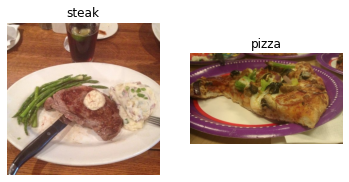

In [4]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range= 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip= True
)

train_datagen = ImageDataGenerator(rescale= 1/255.)

test_datagen = ImageDataGenerator(rescale= 1/255.)

In [6]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary",
    shuffle= False
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary",
    shuffle= False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary"
)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
images, lables = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

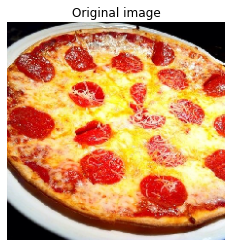

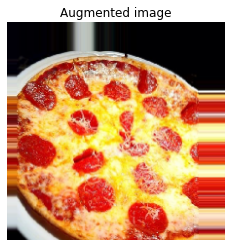

In [8]:
random_number = random.randint(0, 30)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_6 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

In [ ]:
plot_loss_curves(history_6)

In [10]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size= 30,
    class_mode = "binary",
    shuffle= True
)

Found 1500 images belonging to 2 classes.


In [11]:
model_7 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
50/50 [==============================] - 58s 1s/step - loss: 0.6697 - accuracy: 0.5733 - val_loss: 0.5580 - val_accuracy: 0.7300
Epoch 2/5
50/50 [==============================] - 53s 1s/step - loss: 0.5630 - accuracy: 0.7140 - val_loss: 0.3959 - val_accuracy: 0.8260
Epoch 3/5
50/50 [==============================] - 53s 1s/step - loss: 0.4928 - accuracy: 0.7553 - val_loss: 0.3625 - val_accuracy: 0.8520
Epoch 4/5
50/50 [==============================] - 58s 1s/step - loss: 0.4575 - accuracy: 0.7893 - val_loss: 0.3388 - val_accuracy: 0.8580
Epoch 5/5
50/50 [==============================] - 74s 1s/step - loss: 0.4602 - accuracy: 0.7967 - val_loss: 0.3527 - val_accuracy: 0.8400


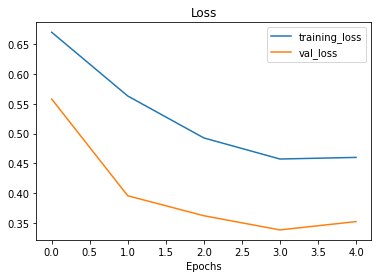

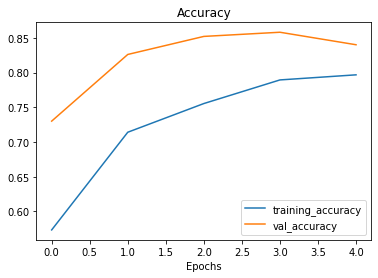

In [12]:
plot_loss_curves(history_7)

뭔가 우리가 만족할 때까지 반복!

1. 모델 레이어를 추가 (더 많은 Convolutional layer를 추가 등등)
2. Convolutional의 필터를 추가 (10에서 32, 64, 128 조정하는데 시행 착오를 통해서 최적의 값을 찾아내는 것)
3. 더 오래 학습 (epoch를 늘리기)
4. 이상적인 learning rate를 찾고
5. 더 많은 데이터 
6. 전이 학습 (transfer learning)을 사용

위의 작업들, 즉 모델 개발 중에 이러한 각 설정들 (1 ~ 4)을 조정하는 것을 일반적으로 하이퍼 파라미터 조정이라고 합니다.

In [13]:
# model_7 = Sequential([
#     Conv2D(
#         filters = 10,
#         kernel_size = 3,
#         activation = "relu",
#         input_shape = (224, 224, 3)
#     ),
#     MaxPool2D(pool_size = 2),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(),
#     Conv2D(10, 3, activation="relu"),
#     MaxPool2D(),
#     Flatten(),
#     Dense(1, activation="sigmoid")
# ])

model_8 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_8.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented_shuffled),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
50/50 [==============================] - 106s 2s/step - loss: 0.6359 - accuracy: 0.6327 - val_loss: 0.5275 - val_accuracy: 0.7460
Epoch 2/5
50/50 [==============================] - 106s 2s/step - loss: 0.5032 - accuracy: 0.7587 - val_loss: 0.3683 - val_accuracy: 0.8400
Epoch 3/5
50/50 [==============================] - 102s 2s/step - loss: 0.4773 - accuracy: 0.7833 - val_loss: 0.3428 - val_accuracy: 0.8520
Epoch 4/5
50/50 [==============================] - 93s 2s/step - loss: 0.4405 - accuracy: 0.7880 - val_loss: 0.4041 - val_accuracy: 0.8180
Epoch 5/5
50/50 [==============================] - 97s 2s/step - loss: 0.4137 - accuracy: 0.8127 - val_loss: 0.2725 - val_accuracy: 0.9020


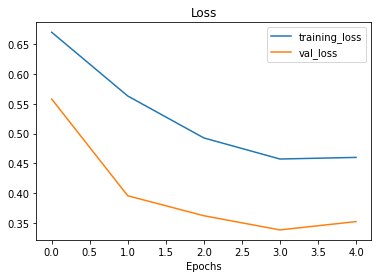

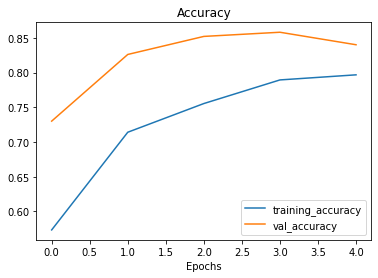

In [14]:
plot_loss_curves(history_7)

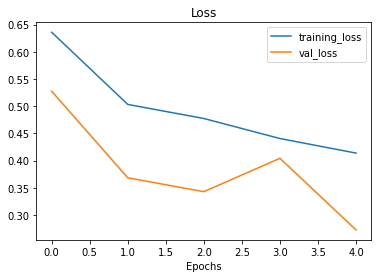

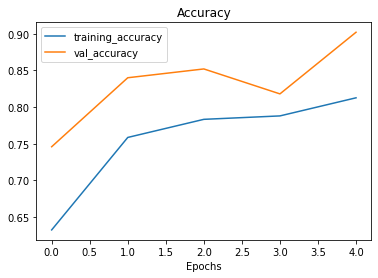

In [15]:
plot_loss_curves(history_8)

우리가 고생고생해서 만들 모델이 예측을 할 수 없다면 아무 소용이 없습니다!

실제로 자신이 가진 임의의 이미지를 업로드해서 모델이 어떻게 작동하는지 확인을 합니다.

In [16]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")

class_names = np.array(
    sorted(
        [item.name for item in data_dir.glob("*")]
    )
)

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [17]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-06-13 11:13:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: '03-steak.jpeg'

     0K .......... .......... .......... .......... ..........  2%  885K 2s
    50K .......... .......... .......... .......... ..........  5% 2.16M 1s
   100K .......... .......... .......... .......... ..........  7% 1.26M 1s
   150K .......... .......... .......... .......... .......... 10%  972K 1s
   200K .......... .......... .......... .......... .......... 12% 2.90M 1s
   250K .......... .......... .......... .......... .......... 15% 4.77M 1s
   300K .......... .......... .......... .......... .......... 18% 1.29M 1s
   350K ....

(-0.5, 3023.5, 4031.5, -0.5)

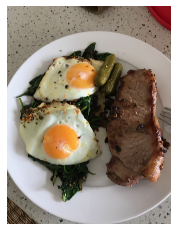

In [18]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [19]:
steak.shape

(4032, 3024, 3)

In [ ]:
학습시 사용한 이미지의 크기는 (224, 224)!
그런데, 예측에 사용할 이미지의 크기는 현재 (4032, 3024)!

예측할 이미지의 크기를 학습시 사용한 이미지의 크기로 변경을 해주어야 합니다.

In [20]:
def load_and_prep_image(filename, img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    img = img / 255.
    return img

In [21]:
steak = load_and_prep_image("03-steak.jpeg")

(batch_size, 224, 224, 4)로 텐서를 변경해주어야 합니다.

In [22]:
print(steak.shape)

(224, 224, 3)


In [23]:
steak = tf.expand_dims(steak, axis = 0)

In [24]:
print(steak.shape)

(1, 224, 224, 3)


In [25]:
pred = model_8.predict(steak)
pred

array([[0.8693738]], dtype=float32)

위 결과 0.87169874 (사람마다 다름)는 예측시 사용한 이미지가 특정 클래스에 속하는 확률!

0.5를 초과하면 positive 클래스, 즉 클래스가 1일 가능성이 높다!

0.5보다 미만이면 negative 클래스, 즉, 클래스가 0일 가능성이 높다!

기준이 되는 즉, cutoff가 되는 0.5는 변경이 가능! 나는 0.8이상만 positive로 보겠다 ->  가능
이 기준은 모델을 개발하는 사람이 결정!


In [26]:
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [27]:
int(tf.round(pred)[0][0])

1

In [28]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [30]:
def pred_and_plot(model, filename, class_name):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis = 0))

    pred_class = class_names[int(tf.round(pred)[0][0])]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

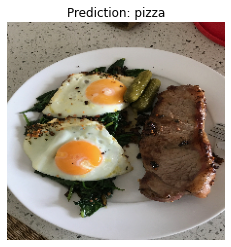

In [31]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

In [32]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-06-13 11:14:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: '03-pizza-dad.jpeg'

     0K .......... .......... .......... .......... ..........  1% 1.29M 2s
    50K .......... .......... .......... .......... ..........  3% 3.39M 1s
   100K .......... .......... .......... .......... ..........  5% 1.07M 2s
   150K .......... .......... .......... .......... ..........  7% 1.70M 2s
   200K .......... .......... .......... .......... ..........  8% 1.05M 2s
   250K .......... .......... .......... .......... .......... 10% 2.63M 2s
   300K .......... .......... .......... .......... .......... 12% 3.82M 1s
   3

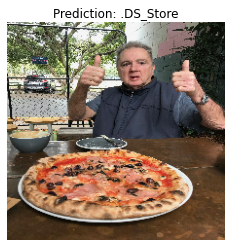

In [33]:
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

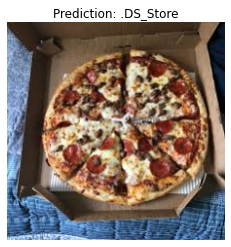

In [34]:
pred_and_plot(model_8, "pizza1.jpg", class_names)

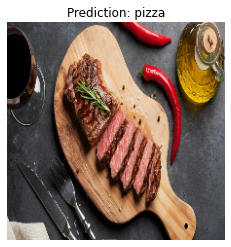

In [35]:
pred_and_plot(model_8, "steak1.jpg", class_names)